# Test Palma data

In [1]:
import tasks as tsk
import numpy as np
import pandas as pd
from tourist import Tourist
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
tasks = pd.read_csv(
            "palmadata/palmapointsofinterest_cleaned.csv", 
            header = 0,
            dtype = {
                "place": 'str',
                "description": 'str',
                "latitude": 'float',
                "longitude": 'float',
                "stars": 'float',
                "reviews": 'float'
            }
        )

In [3]:
tasks["update_utility"] = tsk.standard_penalty

In [4]:
low   = [
         "Plaça de Cort",
         "Plaça de toros de Palma",
         "Plaza Del Mercat",
         "Plaça del Rei Joan Carles I"
        ]
high = [
         "Catedral-Basílica de Santa María de Mallorca",
         "Castell de Bellver",
         "Royal Palace of La Almudaina",
         "Museu Fundación Juan March, Palma",
         "Museo de Mallorca",
         "Museu Diocesà de Mallorca"
        ]

In [6]:
def set_penalty(row, lows, highs):
    if row.place == "cruise ship":
        return tsk.cruise_utility
    elif row.place in lows:
        return tsk.low_penalty
    elif row.place in highs:
        return tsk.high_penalty
    else:
        return row.update_utility


tasks["update_utility"] = tasks.apply(lambda row: set_penalty(row, low, high), axis=1)

In [7]:
tasks

,place,description,latitude,longitude,stars,reviews,utility,update_utility
0,cruise ship,tourist cruise ship,39.568276,2.637640,0.000000,0.0,0.000000,<function cruise_utility at 0x7f46d3f4a4c0>
1,Catedral-Basílica de Santa María de Mallorca,Gothic place of worship on the seafront,39.567425,2.648299,4.674750,31176.0,0.967475,<function high_penalty at 0x7f46d3f4a430>
2,Castell de Bellver,Hilltop 1300s castle for panoramic views,39.563814,2.619354,4.436243,10446.0,0.611157,<function high_penalty at 0x7f46d3f4a430>
3,Royal Palace of La Almudaina,Historic palace of the Royal Family,39.567886,2.647022,4.420346,2310.0,0.479082,<function high_penalty at 0x7f46d3f4a430>
4,Tren Soller,Scenic electric railway dating to 1912,39.576665,2.653782,4.396561,5757.0,0.531987,<function standard_penalty at 0x7f4708205...
5,Es Baluard Museu d'Art Contemporani de Palma,Modern & contemporary art collection,39.570139,2.641112,4.257859,2513.0,0.466089,<function standard_penalty at 0x7f4708205...
6,Plaza Mayor,Historic public square with craft market,39.571371,2.651813,4.244744,21071.0,0.762411,<function standard_penalty at 0x7f4708205...
7,Poble Espanyol de Palma,Venue with recreated Spanish landmarks,39.572720,2.627968,4.057202,2430.0,0.444692,<function standard_penalty at 0x7f4708205...
8,Lonja de Mallorca,Historic building with Gothic design,39.568358,2.644337,4.441206,1956.0,0.475491,<function standard_penalty at 0x7f4708205...
9,Born de Palma,Historic street with high-end shopping,39.570953,2.647002,NaN,NaN,0.100000,<function standard_penalty at 0x7f4708205...


In [8]:
touristt = Tourist(tasks, 20)

In [9]:
touristt.tourist_route()

time: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [10]:
touristt.task_route

[0,
 17,
 24,
 48,
 52,
 21,
 53,
 10,
 47,
 1,
 19,
 31,
 45,
 18,
 38,
 14,
 4,
 12,
 24,
 31,
 50]

In [11]:
tasks.place[touristt.task_route]

0                                           cruise ship
17                       Mercado Gastronómico San Juan
24                              Plaça de toros de Palma
48                                   Estàtua "Es Foner"
52    GOB - Grup Balear d'Ornitologia I Defensa de l...
21                                       Casal Solleric
53                                  Monestir de la Real
10                            Port of Palma de Mallorca
47                    Roman Catholic Diocese of Majorca
1          Catedral-Basílica de Santa María de Mallorca
19                            Església de Santa Eulàlia
31                                      Sa Feixina Park
45                                Parc de les Estacions
18                                         Hort del Rei
38                             Consolat de Mar de Palma
14                    Museu Fundación Juan March, Palma
4                                           Tren Soller
12                                   Mercat de l

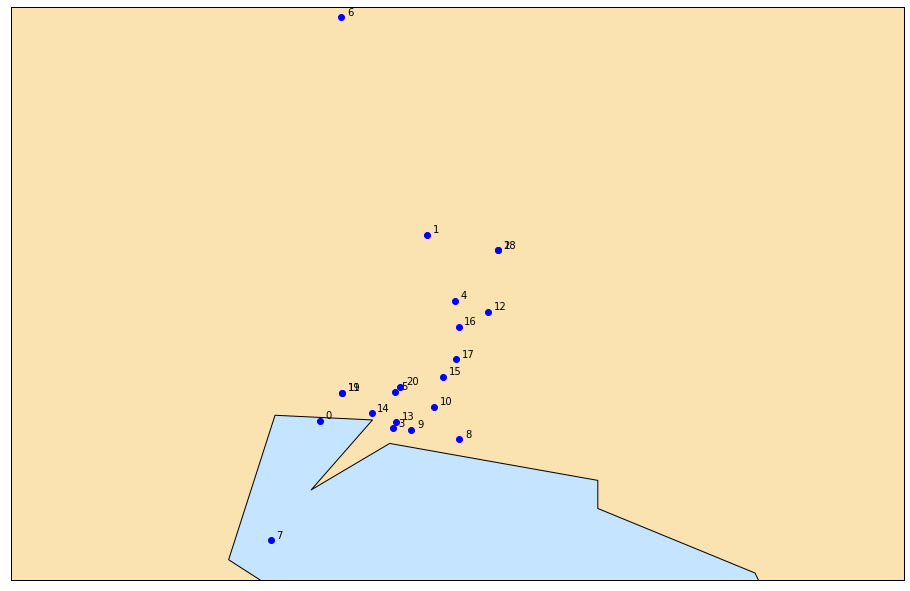

In [53]:
# values
latitude = tasks['latitude'].values[touristt.task_route]
longitude = tasks['longitude'].values[touristt.task_route]

# Map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(
            projection='merc', resolution='h',
            llcrnrlat=39.553956,  # The lower left corner geographical latitude
            llcrnrlon=2.601714,   # The lower left corner geographical longitude
            urcrnrlat=39.605326,  # The upper right corner geographical latitude
            urcrnrlon=2.7055164  # The upper right corner geographical longitude
        )

m.drawcoastlines()
m.drawmapboundary(fill_color='#C5E4FF')
m.fillcontinents(color='#FAE2B1')

# scatter data
m.scatter(longitude, latitude, latlon=True,
          color='blue', alpha=1, zorder=10)

x,y = m(longitude,latitude)
# m.plot(x,y, color='grey',linestyle='-', zorder=12)

labels = [str(i) for i in range(0, len(touristt.task_route))]
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+75, ypt+25, label)

plt.show()